# **Iris Dataset**

Source of dataset: https://archive.ics.uci.edu/dataset/53/iris

# 1. Setup:

In [1]:
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets

# 2. Load and process the Iris dataset:

In [2]:
# Load the original car evaluation dataset
original_iris_data = pd.read_csv('Datasets/iris_data.csv', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

# Get the total number of rows in the dataset
original_iris_data.shape[0]  # This returns the number of rows, (150)

# Display the rows of the original dataset (before any preprocessing)
print(original_iris_data.head(150))  # Adjust the number of rows as needed

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


# 3. Load the modified Iris dataset:

In [3]:
# Load the Iris dataset from the CSV file
iris_data = pd.read_csv('Datasets/iris_data.csv', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

# Perform Label Encoding on the 'class' column (the target column)
label_encoder = LabelEncoder()
iris_data['class_encoded'] = label_encoder.fit_transform(iris_data['class'])  # Encode the categorical species names

# Show the first few rows of the dataset with the encoded target
print(iris_data.head())

# Also show the mapping between the original species names and the encoded labels
for class_name, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"Species '{class_name}' is encoded as: {encoded_label}")


   sepal length  sepal width  petal length  petal width        class  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   class_encoded  
0              0  
1              0  
2              0  
3              0  
4              0  
Species 'Iris-setosa' is encoded as: 0
Species 'Iris-versicolor' is encoded as: 1
Species 'Iris-virginica' is encoded as: 2


In [4]:
# Prepare features (X) and target (y)
X_iris = iris_data.drop('class', axis=1)  # Features (exclude the 'class' column)
y_iris = iris_data['class']  # Target (the 'class' column)

# Define classifiers
classifiers = {
    'Linear SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Define the partitions for training and testing
partitions = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]

# Store results for each classifier, partition, and metric
results = {classifier_name: [] for classifier_name in classifiers}

# Perform training, validation, and testing
for classifier_name, classifier in classifiers.items():
    for train_size, test_size in partitions:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size=train_size, test_size=test_size, random_state=42)
        
        # Train the classifier
        classifier.fit(X_train, y_train)
        
        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
        test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
        
        # Cross-validation for validation accuracy
        validation_accuracy = np.mean(cross_val_score(classifier, X_train, y_train, cv=5))
        
        # Get the hyperparameters for each classifier
        hyperparameters = classifier.get_params()  # This gets the hyperparameters

        # Store the results
        results[classifier_name].append({
            'Train Size': f"{train_size*100}/{test_size*100}",
            'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy,
            'Validation Accuracy': validation_accuracy,
            'Hyperparameters': hyperparameters  # Include hyperparameters in the results
        })

# 4. Display Classifer Results:

In [5]:
# Display results for each classifier
for classifier_name, classifier_results in results.items():
    print(f"\n{classifier_name} Results:")
    for result in classifier_results:
        print(f"Split: {result['Train Size']}")
        print(f"  Training Accuracy: {result['Training Accuracy']:.4f}")
        print(f"  Testing Accuracy: {result['Testing Accuracy']:.4f}")
        print(f"  Validation Accuracy: {result['Validation Accuracy']:.4f}")
        print(f"  Hyperparameters: {result['Hyperparameters']}\n")  # Print hyperparameters


Linear SVM Results:
Split: 20.0/80.0
  Training Accuracy: 1.0000
  Testing Accuracy: 1.0000
  Validation Accuracy: 1.0000
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Split: 50.0/50.0
  Training Accuracy: 1.0000
  Testing Accuracy: 1.0000
  Validation Accuracy: 1.0000
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Split: 80.0/20.0
  Training Accuracy: 1.0000
  Testing Accuracy: 1.0000
  Validation Accuracy: 1.0000
  Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 20

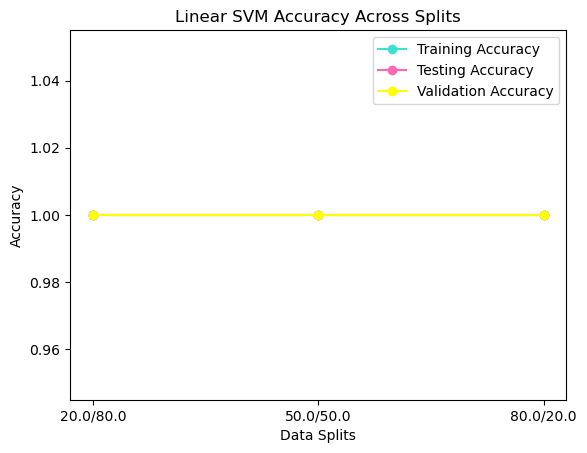

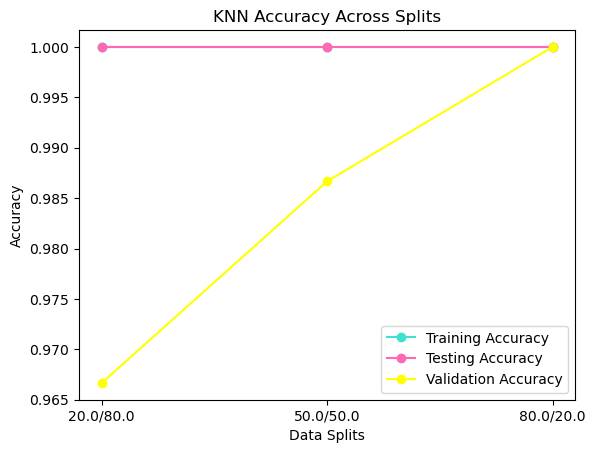

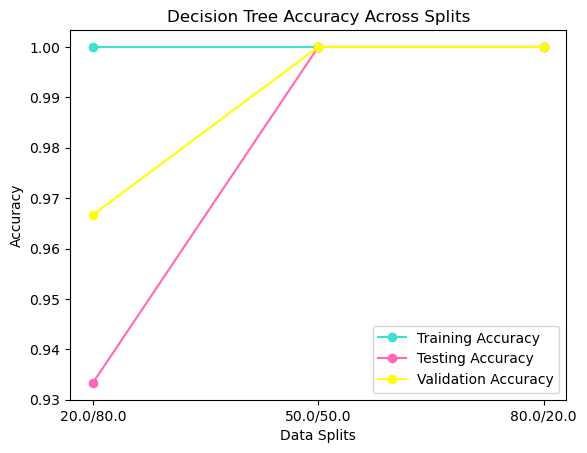

In [11]:
# Visualize accuracies across different data splits for each classifier using line plots
for classifier_name, classifier_results in results.items():
    splits = [result['Train Size'] for result in classifier_results]
    train_accuracies = [result['Training Accuracy'] for result in classifier_results]
    test_accuracies = [result['Testing Accuracy'] for result in classifier_results]
    validation_accuracies = [result['Validation Accuracy'] for result in classifier_results]
    
    # Plot line graphs for training, testing, and validation accuracies
    plt.plot(splits, train_accuracies, marker='o', label='Training Accuracy', color='turquoise')
    plt.plot(splits, test_accuracies, marker='o', label='Testing Accuracy', color='hotpink')
    plt.plot(splits, validation_accuracies, marker='o', label='Validation Accuracy', color='yellow')

    plt.xlabel('Data Splits')
    plt.ylabel('Accuracy')
    plt.title(f'{classifier_name} Accuracy Across Splits')
    plt.legend()
    plt.show()
